# **Tarea sobre Ley de Zipf**

## Para esta tarea es necesario que sepas utiliza [pandas](https://pandas.pydata.org/docs/user_guide/index.html), el paquete de python para manejo efectivo de datos.
### Los siguientes vínculos te pueden resultar útiles:
- [Tutorial de pandas](https://interactivechaos.com/es/manual/tutorial-de-pandas/tutorial-de-pandas)
- [Video corto](https://www.youtube.com/watch?v=zVgmPAn09Uk)

### **Módulos necesarios**

In [1]:
import numpy as np
import pandas as pd
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mount del drive para colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path  

# Path para forma local
#filepath = './datos_MT/Wikipedia_texts/'

# Path para colab
filepath = 'drive/MyDrive/Colab Notebooks/Mineria de texto/datos_MT/Wikipedia_texts/'

### **Documentos de la wikipedia**

In [ ]:
train = pd.read_csv(Path(filepath+'train.csv'))
train.drop(train.columns[train.columns.str.contains('^Unnamed')],axis=1,inplace=True)
devel = pd.read_csv(Path(filepath+'devel.csv'))
devel.drop(devel.columns[devel.columns.str.contains('^Unnamed')],axis=1,inplace=True)
test = pd.read_csv(Path(filepath+'test.csv'))
test.drop(test.columns[test.columns.str.contains('^Unnamed')],axis=1,inplace=True)
test

,doc_id,Texto
0,1896678,kirschnaumen población comuna francesa región ...
1,1888254,yves allègert director cine nacido asnières ha...
2,1887692,manolito gafotas serie televisión emtida anten...
3,1891464,dominio dragones libro george martin pertenece...
4,1896184,machín toda vida película española año dirigid...
...,...,...
95,1881871,hms marlborough acorazado royal navy pertenecí...
96,1878401,hermann mayer salomon goldschmidt junio abril ...
97,1886573,grèzes población comuna francesa situada regió...
98,1878966,david bennett botánico explorador estadouniden...


### **Ejemplo de cómo recuperar los documentos y las palabras**

In [ ]:
docs=test.Texto.values
for d in docs[:2]:
    for palabra in d.split():
        print("'{}'".format(palabra), end=' ')
    print('\n\n')

'kirschnaumen' 'población' 'comuna' 'francesa' 'región' 'lorena' 'departamento' 'mosela' 'distrito' 'thionvilleest' 'cantón' 'siercklesbains' 'demografía' 'enlaces' 'externos' 'insee' 'elecciones' 'municipales' 


'yves' 'allègert' 'director' 'cine' 'nacido' 'asnières' 'hautsdeseine' 'îledefrance' 'francia' 'octubre' 'falleció' 'parís' 'enero' 'hermano' 'menor' 'director' 'marc' 'allègret' 'casado' 'actriz' 'simone' 'signoret' 'hija' 'catherine' 'allégret' 'actriz' 'filmografía' 'enquêtes' 'commissaire' 'maigret' 'episodios' 'une' 'confidence' 'maigret' 'episode' 'pendu' 'saintphollien' 'episode' 'maigret' 'lindicateur' 'episode' 'maigret' 'fou' 'bergerac' 'episode' 'mords' 'pas' 'taime' 'graine' 'dortie' 'serie' 'linvasion' 'max' 'débonnaire' 'serie' 'segmento' 'quoi' 'mêle' 'johnny' 'banco' 'germinal' 'konga' 'lambitieuse' 'fille' 'hambourg' 'quand' 'femme' 'sen' 'mêle' 'godot' 'italy' 'die' 'killer' 'lassen' 'bittenwest' 'germany' 'sans' 'attendre' 'godot' 'france' 'alternative' 'ti

In [ ]:
ayd = 0
docs=train.Texto.values
for oracion in docs:
  ayd += len(oracion.split())
ayd

128417

In [ ]:
docs[0]

'kirschnaumen población comuna francesa región lorena departamento mosela distrito thionvilleest cantón siercklesbains demografía enlaces externos insee elecciones municipales'

### **Ejemplo de cómo contar palabras en el DF**

In [ ]:
df = test.copy()
df['Conteos']=df['Texto'].apply(lambda x: Counter(x.split()))
df

,doc_id,Texto,Conteos
0,1896678,kirschnaumen población comuna francesa región ...,"{'kirschnaumen': 1, 'población': 1, 'comuna': ..."
1,1888254,yves allègert director cine nacido asnières ha...,"{'yves': 1, 'allègert': 1, 'director': 2, 'cin..."
2,1887692,manolito gafotas serie televisión emtida anten...,"{'manolito': 3, 'gafotas': 2, 'serie': 3, 'tel..."
3,1891464,dominio dragones libro george martin pertenece...,"{'dominio': 1, 'dragones': 2, 'libro': 1, 'geo..."
4,1896184,machín toda vida película española año dirigid...,"{'machín': 3, 'toda': 3, 'vida': 2, 'película'..."
...,...,...,...
95,1881871,hms marlborough acorazado royal navy pertenecí...,"{'hms': 2, 'marlborough': 4, 'acorazado': 1, '..."
96,1878401,hermann mayer salomon goldschmidt junio abril ...,"{'hermann': 1, 'mayer': 1, 'salomon': 1, 'gold..."
97,1886573,grèzes población comuna francesa situada regió...,"{'grèzes': 1, 'población': 1, 'comuna': 1, 'fr..."
98,1878966,david bennett botánico explorador estadouniden...,"{'david': 2, 'bennett': 3, 'botánico': 1, 'exp..."


# TAREA
# **Ley de Zipf**
## Construye una tabla como la Tabla 1.3 del libro de Manning:
<h3><ol>
  <li>Para el conjunto de los documentos de prueba (test).</li>
  <li>Construyendo un generador de palabras aleatorias como se sugiere en la página 28 del libro (el que genera letras de A a Z y espacios en blanco con igual probabilidad 1/27).</li></ol></h3>

### Ley de Zipf para documentos de prueba

Primero se combinan todos los textos y se hace el conteo de ocurrencia por cada palabra

In [ ]:
docs = test.Texto.values
corpora = ''
for text in docs:
  corpora += ' '+text
conteoPalabras = Counter(corpora.split())

Luego se agrega en un data frame de pandas para ser ordenador por frecuencia

In [ ]:
tZipf = pd.DataFrame.from_dict(conteoPalabras, orient='index',columns=['Frecuencia']).sort_values('Frecuencia',ascending=False)
tZipf

,Frecuencia
años,58
externos,57
enlaces,56
colegio,53
referencias,51
...,...
construyera,1
solicitó,1
dodnde,1
irigió,1


Por ultimo se agrega una columna que especifica el rango y se aplica una función lambda para multiplicar la frecuencia por el rango

In [ ]:
tZipf['Rango'] = range(1,len(conteoPalabras)+1)
tZipf['F*R'] = tZipf.apply(lambda x: x.Frecuencia * x.Rango,axis=1)
tZipf 

,Frecuencia,Rango,F*R
años,58,1,58
externos,57,2,114
enlaces,56,3,168
colegio,53,4,212
referencias,51,5,255
...,...,...,...
construyera,1,7128,7128
solicitó,1,7129,7129
dodnde,1,7130,7130
irigió,1,7131,7131


Por último se grafica el rango y frecuencia en escala logaritmica

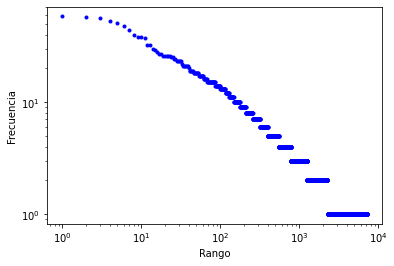

In [ ]:
plt.plot(tZipf['Rango'],tZipf['Frecuencia'],'bo',markersize=3)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Rango")
plt.ylabel("Frecuencia")
plt.show()

### Ley de Zipf para generador aleatorio

Primero se define un alfabeto del cual se recojeran las letras para formar el corpus

In [ ]:
Alfabeto = [chr(a) for a in range(ord('a'),ord('a')+26)]
Alfabeto.append(' ')
print(Alfabeto[:5],Alfabeto[-5:])

['a', 'b', 'c', 'd', 'e'] ['w', 'x', 'y', 'z', ' ']


Despues se genera un texto aleatorio de 100,000 letras tomando cualquiera de las letras del alfabeto con la misma probabilidad y se realiza el conteo de la frecuencia de cada palabra

In [ ]:
textoAleatorio = ''.join(np.random.choice(Alfabeto, 1000000))
conteoPalabrasAleatorias = Counter(textoAleatorio.split())

Se introduce el conteo de palabras a un data frame, se ordena por la columna "Frecuencia", se agrega la columna "Rango" y se calcula "F*R"

In [ ]:
tZipfAleatorio = pd.DataFrame.from_dict(conteoPalabrasAleatorias, orient='index',columns=['Frecuencia']).sort_values('Frecuencia',ascending=False)
tZipfAleatorio['Rango'] = range(1,len(conteoPalabrasAleatorias)+1)
tZipfAleatorio['F*R'] = tZipfAleatorio.apply(lambda x: x.Frecuencia * x.Rango,axis=1)
tZipfAleatorio

,Frecuencia,Rango,F*R
e,64,1,64
q,59,2,118
a,58,3,174
j,57,4,228
s,57,5,285
...,...,...,...
okyynpxlhddwvlsnxqnmqdgavyukzyxluxmgqstlds,1,33514,33514
xzmmdaacxld,1,33515,33515
ueysijmvzuohelwifvcgskalwcbitqir,1,33516,33516
gwuflruprteewddsmolbtwaqpbcbxqnkltwwixl,1,33517,33517


Por ultimo se grafica el rango y frecuencia en escala logaritmica

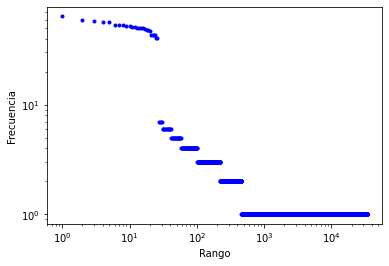

In [ ]:
plt.plot(tZipfAleatorio['Rango'],tZipfAleatorio['Frecuencia'],'bo',markersize=3)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Rango")
plt.ylabel("Frecuencia")
plt.show()

# Ejercicio en clase
# **N-Gramas**
### Construir un modelo de unigrama, bigrama y trigrama para los documentos de prueba (test)

### Modelo de unigramas

Primero juntamos los documentos en un solo corpus

In [ ]:
corpus = []
numTokens = 0
for text in docs:
  corpus += text.split()
numTokens = len(corpus)
print("# Tokens: ",numTokens)

# Tokens:  14650


Despues se realia el conteo de todos los unigramas posibles

In [ ]:
conteoUnigramas = {}
for i in range(0,len(corpus)):
  conteoUnigramas[corpus[i]] = conteoUnigramas.setdefault(corpus[i], 0) + 1

Construimos el dataFrame donde se almacenaran los conteos y probabilidades de todos lo unigramas

In [ ]:
unigramas = pd.DataFrame.from_dict(conteoUnigramas,orient='index',columns=['C(w)'])
unigramas["P(w)"] = unigramas["C(w)"]/numTokens
unigramas = unigramas.sort_values("P(w)")
unigramas["Sum P(w)"] = unigramas["P(w)"].cumsum()
unigramas

,C(w),P(w),Sum P(w)
kirschnaumen,1,0.000068,0.000068
distinguir,1,0.000068,0.000137
nonestatal,1,0.000068,0.000205
anualmente,1,0.000068,0.000273
skoch,1,0.000068,0.000341
...,...,...,...
referencias,51,0.003481,0.984710
colegio,53,0.003618,0.988328
enlaces,56,0.003823,0.992150
externos,57,0.003891,0.996041


Grafica de las probabilidades acumuladas de los trigramas

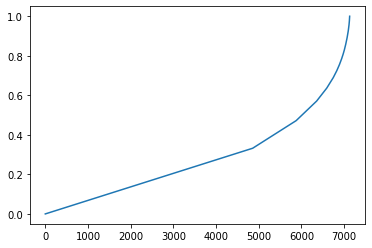

In [ ]:
plt.plot(range(0,7132),unigramas["Sum P(w)"])
plt.show()

Definimos la funcion para obtener una palabra al azar del dataFrame de unigramas

In [ ]:
def PalabraAlAzar():
  randNumber = np.random.uniform()
  indice = unigramas["Sum P(w)"].searchsorted(randNumber)
  palabra = unigramas.index[indice]
  return palabra,randNumber

In [ ]:
a,b = PalabraAlAzar()
print("Palabra: ",a," P(a) acumulada: ",unigramas.loc[a]["Sum P(w)"]," Prob obtenida: ",b, "Corroborar: ",unigramas.loc[a]["Sum P(w)"] >= b)

Palabra:  insinúa  P(a) acumulada:  0.31924914675768756  Prob obtenida:  0.3191924021510669 Corroborar:  True


Usando la función para obtener una palabra al azar de los unigramas, generamos una oracion

In [ ]:
oracion = ""
tamOracion = 0

while(tamOracion < 40):
  oracion += PalabraAlAzar()[0] + ' '
  tamOracion += 1

print("Oración generada al azar usando un modelo de unigramas: \n",oracion)

Oración generada al azar usando un modelo de unigramas: 
 sólo años cruce diciembre york perubahita show andanus acontecimientos memoria capitales crónica localizado alta friarvision finalizar tremelay gorzata familia particularmente concurso dédée henkjan galo contiene socioeconómico audiciones viejo biomasa runciman tigra juarros ejemplos university incluida nueva obra hello segunda menores 


### Modelo de bigramas

####Para este modelo se requieren los conteos de los unigramas que se encuentran en el modelo anterior

Se juntan los documentos en un solo corpus

In [ ]:
corpus = []
numOraciones = len(docs)
for text in docs:
  corpus += ["<s>"]+text.split()+["<\s>"]

print("# de oraciones: ",numOraciones)

# de oraciones:  100


Despues se realizan los conteos de cada bigrama posible

In [ ]:
conteoBigramas = {}
for i in range(0,len(corpus)-1):
  conteoBigramas[(corpus[i],corpus[i+1])] = conteoBigramas.setdefault((corpus[i],corpus[i+1]), 0) + 1

Usando los conteos se crea el dataFrame para los bigramas

In [ ]:
bigramas = pd.DataFrame.from_dict(conteoBigramas,orient="index",columns=['C(w2|w1)'])
bigramas = bigramas.drop(index=[('<\s>', '<s>')])
bigramas["P(w2|w1)"] = bigramas.apply(lambda x: x["C(w2|w1)"]/numOraciones if x.name[0] == "<s>" else x["C(w2|w1)"]/unigramas.loc[x.name[0]]["C(w)"],axis = 1)
bigramas = bigramas.sort_index()
bigramas

,C(w2|w1),P(w2|w1)
"(<s>, abdelouahid)",1,0.010000
"(<s>, ada)",1,0.010000
"(<s>, against)",1,0.010000
"(<s>, agama)",1,0.010000
"(<s>, apariciones)",1,0.010000
...,...,...
"(únicos, atrevieron)",1,0.333333
"(únicos, jugadores)",1,0.333333
"(únicos, subordinados)",1,0.333333
"(útero, rock)",1,1.000000


Lo siguiente es calcular las probabilidades acumuladas de toda la tabla

In [ ]:
probabilidadAcumulada = [bigramas.iloc[0]["P(w2|w1)"]]
for i in range(1,bigramas.shape[0]):
  if(bigramas.iloc[i].name[0] == bigramas.iloc[i-1].name[0]):
    probabilidadAcumulada.append(bigramas.iloc[i]["P(w2|w1)"] + probabilidadAcumulada[i-1])
  else:
    probabilidadAcumulada.append(bigramas.iloc[i]["P(w2|w1)"])
bigramas["Sum P(w2|w1)"] = probabilidadAcumulada
bigramas

,C(w2|w1),P(w2|w1),Sum P(w2|w1)
"(<s>, abdelouahid)",1,0.010000,0.010000
"(<s>, ada)",1,0.010000,0.020000
"(<s>, against)",1,0.010000,0.030000
"(<s>, agama)",1,0.010000,0.040000
"(<s>, apariciones)",1,0.010000,0.050000
...,...,...,...
"(únicos, atrevieron)",1,0.333333,0.333333
"(únicos, jugadores)",1,0.333333,0.666667
"(únicos, subordinados)",1,0.333333,1.000000
"(útero, rock)",1,1.000000,1.000000


Con el dataFrame construido, podemos extraer un dataFrame con todos los bigramas con el contexto en común

In [ ]:
contexto = "<s>"
bigramas[bigramas.apply(lambda x: x.name[0] == contexto, axis=1)]

,C(w2|w1),P(w2|w1),Sum P(w2|w1)
"(<s>, abdelouahid)",1,0.01,0.01
"(<s>, ada)",1,0.01,0.02
"(<s>, against)",1,0.01,0.03
"(<s>, agama)",1,0.01,0.04
"(<s>, apariciones)",1,0.01,0.05
...,...,...,...
"(<s>, unión)",1,0.01,0.96
"(<s>, yoseikan)",1,0.01,0.97
"(<s>, yves)",1,0.01,0.98
"(<s>, zinovy)",1,0.01,0.99


Definimos la función para obtener una palabra al azar dado el contexto

In [ ]:
def PalabraAlAzarBigramas(contexto):
  randNumber = np.random.uniform()
  bigramasDadoContexto = bigramas[bigramas.apply(lambda x: x.name[0] == contexto, axis=1)]
  indice = bigramasDadoContexto["Sum P(w2|w1)"].searchsorted(randNumber)
  palabra = bigramasDadoContexto.index[indice]
  return palabra,randNumber

In [ ]:
a,b = PalabraAlAzarBigramas("<s>")
print("Palabra: ",a," P(a) acumulada: ",bigramas.loc[[a]]["Sum P(w2|w1)"][0]," Prob obtenida: ",b, "Corroborar: ",bigramas.loc[[a]]["Sum P(w2|w1)"][0] >= b)

Palabra:  ('<s>', 'calle')  P(a) acumulada:  0.17  Prob obtenida:  0.1628732594203517 Corroborar:  True


Por ultimo usando la función generamos una oración de máximo 10 palabras

In [ ]:
oracion = ""
tamOracion = 0
contexto = "<s>"

while(tamOracion < 10 and contexto != "<\s>"):
  contexto = PalabraAlAzarBigramas(contexto)[0][1]
  oracion += contexto + ' '
  tamOracion += 1

print("Oración generada al azar usando un modelo de bigramas: \n",oracion)

Oración generada al azar usando un modelo de bigramas: 
 robert young comenzando usar sólo jardín encuentra giant forest dentro 


### Modelo de trigramas
#### Para este modelo se requieren los conteos de los bigramas que se encuentran en el modelo anterior

Se juntan los documentos en un solo corpus

In [ ]:
corpus = []
numOraciones = len(docs)
for text in docs:
  corpus += ["<s>","<s>"]+text.split()+["<\s>","<\s>"]

print("# de oraciones: ",numOraciones)

# de oraciones:  100


Despues se realizan los conteos de cada trigrama posible

In [ ]:
conteoTrigramas = {}
for i in range(0,len(corpus)-2):
  conteoTrigramas[(corpus[i],corpus[i+1],corpus[i+2])] = conteoTrigramas.setdefault((corpus[i],corpus[i+1],corpus[i+2]), 0) + 1

Usando los conteos de los trigramas se genera el dataFrame

In [ ]:
trigramas = pd.DataFrame.from_dict(conteoTrigramas,orient="index",columns=['C(w3|w1w2)'])
trigramas = trigramas.drop(index=[('<\s>', '<\s>','<s>')])
trigramas = trigramas.drop(index=[('<\s>', '<s>','<s>')])
trigramas["P(w3|w1w2)"] = trigramas.apply(lambda x: x["C(w3|w1w2)"]/numOraciones if x.name[1] == "<s>" else x["C(w3|w1w2)"]/bigramas.loc[[(x.name[0],x.name[1])]]["C(w2|w1)"][0],axis = 1)
trigramas = trigramas.sort_index()
trigramas

,C(w3|w1w2),P(w3|w1w2)
"(<s>, <s>, abdelouahid)",1,0.01
"(<s>, <s>, ada)",1,0.01
"(<s>, <s>, against)",1,0.01
"(<s>, <s>, agama)",1,0.01
"(<s>, <s>, apariciones)",1,0.01
...,...,...
"(únicos, atrevieron, enfrentarse)",1,1.00
"(únicos, jugadores, equipo)",1,1.00
"(únicos, subordinados, frederick)",1,1.00
"(útero, rock, promovió)",1,1.00


Luego se calculan las probabilidades acumuladas para todo el dataFrame

In [ ]:
probabilidadAcumulada = [trigramas.iloc[0]["P(w3|w1w2)"]]
for i in range(1,trigramas.shape[0]):
  if(trigramas.iloc[i].name[0:2] == trigramas.iloc[i-1].name[0:2]):
    probabilidadAcumulada.append(trigramas.iloc[i]["P(w3|w1w2)"] + probabilidadAcumulada[i-1])
  else:
    probabilidadAcumulada.append(trigramas.iloc[i]["P(w3|w1w2)"])
trigramas["Sum P(w3|w1w2)"] = probabilidadAcumulada
trigramas

,C(w3|w1w2),P(w3|w1w2),Sum P(w3|w1w2)
"(<s>, <s>, abdelouahid)",1,0.01,0.01
"(<s>, <s>, ada)",1,0.01,0.02
"(<s>, <s>, against)",1,0.01,0.03
"(<s>, <s>, agama)",1,0.01,0.04
"(<s>, <s>, apariciones)",1,0.01,0.05
...,...,...,...
"(únicos, atrevieron, enfrentarse)",1,1.00,1.00
"(únicos, jugadores, equipo)",1,1.00,1.00
"(únicos, subordinados, frederick)",1,1.00,1.00
"(útero, rock, promovió)",1,1.00,1.00


De esta forma se puede obtener un dataFrame con los trigramas que tengan el mismo contexto

In [ ]:
contexto = ("<s>","<s>")
trigramas[trigramas.apply(lambda x: x.name[0:2] == contexto, axis=1)]

,C(w3|w1w2),P(w3|w1w2),Sum P(w3|w1w2)
"(<s>, <s>, abdelouahid)",1,0.01,0.01
"(<s>, <s>, ada)",1,0.01,0.02
"(<s>, <s>, against)",1,0.01,0.03
"(<s>, <s>, agama)",1,0.01,0.04
"(<s>, <s>, apariciones)",1,0.01,0.05
...,...,...,...
"(<s>, <s>, unión)",1,0.01,0.96
"(<s>, <s>, yoseikan)",1,0.01,0.97
"(<s>, <s>, yves)",1,0.01,0.98
"(<s>, <s>, zinovy)",1,0.01,0.99


Definimos la función para obtener una palabra al azar dado el contexto y utilizando el modelo de trigramas

In [ ]:
def PalabraAlAzarTrigramas(contexto):
  randNumber = np.random.uniform()
  trigramasDadoContexto = trigramas[trigramas.apply(lambda x: x.name[0:2] == contexto, axis=1)]
  indice = trigramasDadoContexto["Sum P(w3|w1w2)"].searchsorted(randNumber)
  palabra = trigramasDadoContexto.index[indice]
  return palabra,randNumber

In [ ]:
a,b = PalabraAlAzarTrigramas(("<s>","<s>"))
print("Palabra: ",a," P(a) acumulada: ",trigramas.loc[[a]]["Sum P(w3|w1w2)"][0]," Prob obtenida: ",b, "Corroborar: ",trigramas.loc[[a]]["Sum P(w3|w1w2)"][0] >= b)

Palabra:  ('<s>', '<s>', 'sabanas')  P(a) acumulada:  0.7900000000000005  Prob obtenida:  0.7892853553434949 Corroborar:  True


Usando la función generamos una palabra de máximo 40 caracteres

In [ ]:
oracion = ""
tamOracion = 0
contexto = ["<s>","<s>"]

while(tamOracion < 40 and contexto[1] != "<\s>"):
  tuplaContexto = tuple(contexto)
  contexto[0] = contexto[1]
  contexto[1] = PalabraAlAzarTrigramas(tuplaContexto)[0][2]
  oracion += contexto[1] + ' '
  tamOracion += 1

print("Oración generada al azar usando un modelo de trigramas: \n",oracion)

Oración generada al azar usando un modelo de trigramas: 
 petco park the park berma pendiente cubierta hierba encima valla campo trasero abierta juegos permitiendo fanáticos sienten miren partidos tan sólo promedió puntos rebotes asistencias finalmente firmó contrato warriors septiembre equipos golden state warriors nba mide metros altura juega posición 


# Tarea
# **Evaluación de los modelos de n-gramas**

#### Construcción del vocabulario

In [ ]:
train

,doc_id,Texto
0,1883698,hyman roth personaje ficticio película padrino...
1,1883688,freno regenerativo dispositivo permite reducir...
2,1886956,symmorium género extinto tiburón estetacántido...
3,1894710,pedro blanco ariza periodista español cadena s...
4,1892350,universidad tecnológica manzanillo institución...
...,...,...
805,1896658,kerlinglèssierck población comuna francesa reg...
806,1876630,fundación libro entidad civil fines lucro sede...
807,1887851,auterive población comuna francesa ubicada reg...
808,1890484,munilla conocida munilla hoz localidad situada...


In [ ]:
corpusMini = ["a b c d e"
              ,"a a b d a"
              ,"e b c a b"
              ,"c b"
              ,"b b c c b"
              ,"e e b"
              ,"d"
              ,"b d"
              ,"d e"
              ,"e e e a b"]
corpusMini
              

Corpus de Brown de la categoria de humor

In [5]:
import nltk
from nltk.corpus import brown
from random import shuffle
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [4]:
corpusBrownHumorSucio = list(brown.sents(categories="humor"))
corpusBrownHumor = []

for oracionBrown in corpusBrownHumorSucio:
  oracionLimpia = ""
  for palabra in oracionBrown:
    oracionLimpia+= palabra.lower()+' '
  corpusBrownHumor.append(oracionLimpia)

shuffle(corpusBrownHumor)
len(corpusBrownHumor)

NameError: ignored

In [ ]:
particion = round(len(corpusBrown)*0.8)

trainBrown = corpusBrownHumor[:particion]
testBrown = corpusBrownHumor[particion:]
print("Oraciones Train: ",len(trainBrown),"\nOraciones Test: ",len(testBrown))


NameError: ignored

In [ ]:
docsTrain =  trainBrown #corpusMini #train.Texto.values  #
docsTest = testBrown #test.Texto.values
numOraciones = len(docsTrain)

corpus = []
for text in docsTrain:
 corpus += text.split()
numTokens = len(corpus)
conteoCorpus = Counter(corpus)

In [ ]:
vocabulario = pd.DataFrame.from_dict(conteoCorpus,orient="index",columns=["Frecuencia"])
vocabulario = vocabulario.sort_values("Frecuencia",ascending=False)
vocabulario

,Frecuencia
",",1049
the,792
.,704
and,418
a,414
...,...
manifestations,1
multiply,1
effloresce,1
riddling,1


In [ ]:
vocabulario.shape[0]

4099

#### Creación de los esquemas

Cada esquema especifica cuales palabras del vocabulario seran consideradas como palabras desconocidas y cambiadas al token "\<UNK\>" 

De cada $i$-esimo esquema se obtendra:

*   $corpusEsquema_i$: Una versión del corpus original pero con algunas palabras cambiadas al token "\<UNK\>" dependiendo el esquema  
*   $conteoEsquema_i$: Los conteos por cada palabra del $corpusEsquema_i$

##### Esquema 1: Todas las palabras del vocabulario con frecuencia menor o igual a 5 son \<UNK\> (Token especial para las palabras desconocidas

In [ ]:
vocabularioEsq1 = vocabulario[vocabulario.apply(lambda x: x["Frecuencia"] > 5,axis=1)]
tamVocabularioEsq1 = vocabularioEsq1.shape[0]+2  #Agregamos el caracter <UNK> y </s>
vocabularioEsq1

,Frecuencia
",",1049
the,792
.,704
and,418
a,414
...,...
should,6
picture,6
live,6
blatz,6


In [ ]:
corpusEsquema1 = []
conteoEsquema1 = {"<UNK>":0,"<\s>":numOraciones}
for oracion in docsTrain:
  oracionEsquema1 = []
  for palabra in oracion.split():
    if palabra in vocabularioEsq1.index:
      oracionEsquema1.append(palabra)
      conteoEsquema1[palabra] = conteoEsquema1.setdefault(palabra,0)+1
    else:
      oracionEsquema1.append("<UNK>")
      conteoEsquema1["<UNK>"] += 1
  corpusEsquema1.append(oracionEsquema1)
corpusEsquema1[0][0:10]

['and', 'then', '<UNK>', 'was', '<UNK>', 'as', '<UNK>', ',', 'in', '<UNK>']

In [ ]:
esquema1 = pd.DataFrame.from_dict(conteoEsquema1, orient="index",columns=["Frecuencia"])
esquema1 = esquema1.sort_index()
esquema1

,Frecuencia
!,62
',25
'',276
(,24
),24
...,...
year,8
years,16
you,106
you're,7


##### Esquema 2: Las 5000 palabras más frecuentes del vocabulario




In [ ]:
vocabularioEsq2 = vocabulario.head(500)
tamVocabularioEsq2 = vocabularioEsq2.shape[0]+2
vocabularioEsq2

,Frecuencia
",",1049
the,792
.,704
and,418
a,414
...,...
week,4
telephone,4
stool,4
taking,4


In [ ]:
corpusEsquema2 = []
conteoEsquema2 = {"<UNK>": 0,"<\s>":numOraciones}
for oracion in docsTrain:
  oracionEsquema2 = []
  for palabra in oracion.split():
    if palabra in vocabularioEsq2.index:
      oracionEsquema2.append(palabra)
      conteoEsquema2[palabra] = conteoEsquema2.setdefault(palabra,0)+1
    else:
      oracionEsquema2.append("<UNK>")
      conteoEsquema2["<UNK>"]+=1
  corpusEsquema2.append(oracionEsquema2)
corpusEsquema2[0][0:10]

['and', 'then', '<UNK>', 'was', '<UNK>', 'as', 'saying', ',', 'in', '<UNK>']

In [ ]:
esquema2 = pd.DataFrame.from_dict(conteoEsquema2, orient="index",columns=["Frecuencia"])
esquema2 = esquema2.sort_index()
esquema2

,Frecuencia
!,62
',25
'',276
(,24
),24
...,...
yet,4
you,106
you're,7
you've,4


#### Creación de los N-Gramas, para los esquemas 1 y 2

##### Creacion de los unigramas

In [ ]:
def CrearDFUnigramas(conteosPalabras,numTokens,numOraciones):
  dfUnigramas = pd.DataFrame.from_dict(conteosPalabras,orient="index",columns=["C(w)"])
  dfUnigramas["P(w)"] = dfUnigramas["C(w)"]/(numOraciones+numTokens)
  dfUnigramas.loc["<s>"] = [numOraciones,1]
  dfUnigramas["Sum"] = dfUnigramas["P(w)"].cumsum()
  return dfUnigramas

In [ ]:
unigramasEsq1 = CrearDFUnigramas(conteoEsquema1,numTokens,numOraciones)
unigramasEsq1

,C(w),P(w),Sum
<UNK>,5500,0.306151,0.306151
<\s>,842,0.046869,0.353020
and,418,0.023267,0.376287
then,30,0.001670,0.377957
was,214,0.011912,0.389869
...,...,...,...
power,7,0.000390,0.998998
whole,6,0.000334,0.999332
tools,6,0.000334,0.999666
still,6,0.000334,1.000000


In [ ]:
unigramasEsq2 = CrearDFUnigramas(conteoEsquema2,numTokens,numOraciones)
unigramasEsq2

,C(w),P(w),Sum
<UNK>,4605,0.256332,0.256332
<\s>,842,0.046869,0.303201
and,418,0.023267,0.326468
then,30,0.001670,0.328138
was,214,0.011912,0.340050
...,...,...,...
need,4,0.000223,0.999332
attempt,4,0.000223,0.999555
actor,4,0.000223,0.999777
busy,4,0.000223,1.000000


##### Creación de los bigramas

NOTA: La cración de los bigramas para cada esquema tardó 5 seg. en colab

In [ ]:
def CrearDFBigramas(dfUnigramas,conteoBigramas,tamVocabulario):
  dfBigramas = pd.DataFrame.from_dict(conteoBigramas,orient="index",columns=['C(w2|w1)']) 
  dfBigramas["P(w2|w1)"] = dfBigramas.apply(lambda x: (x["C(w2|w1)"]+1)/(dfUnigramas.loc[x.name[0]]["C(w)"]+tamVocabulario),axis = 1)
  return dfBigramas

In [ ]:
def CrearConteoBigramas(corpus):
  conteoBigramas = {("<s>","<s>"):len(corpus)}
  for oracion in corpus:
    for i in range(0,len(oracion)-1):
      conteoBigramas[(oracion[i],oracion[i+1])] = conteoBigramas.setdefault((oracion[i],oracion[i+1]), 0) + 1
    conteoBigramas[("<s>",oracion[0])] = conteoBigramas.setdefault(("<s>",oracion[0]), 0) + 1
    conteoBigramas[(oracion[-1],"<\s>")] = conteoBigramas.setdefault((oracion[-1],"<\s>"), 0) + 1
  return conteoBigramas

In [ ]:
conteoBigramasEsq1 = CrearConteoBigramas(corpusEsquema1)
conteoBigramasEsq2 = CrearConteoBigramas(corpusEsquema2)

In [ ]:
bigramasEsq1 = CrearDFBigramas(unigramasEsq1,conteoBigramasEsq1,tamVocabularioEsq1)
bigramasEsq1

,C(w2|w1),P(w2|w1)
"(<s>, <s>)",842,0.740123
"(and, then)",7,0.011189
"(then, <UNK>)",8,0.027523
"(<UNK>, was)",50,0.008798
"(was, <UNK>)",106,0.209393
...,...,...
"(when, your)",1,0.005848
"(and, your)",1,0.002797
"(i, see)",1,0.004115
"(girl, but)",1,0.006536


In [ ]:
b = bigramasEsq1[bigramasEsq1.apply(lambda x: x.name[0]=="then",axis=1)]
b

,C(w2|w1),P(w2|w1)
"(then, <UNK>)",8,0.027523
"(then, ,)",8,0.027523
"(then, it)",1,0.006116
"(then, they)",2,0.009174
"(then, there)",2,0.009174
"(then, arlene)",1,0.006116
"(then, again)",2,0.009174
"(then, made)",1,0.006116
"(then, a)",1,0.006116
"(then, he)",1,0.006116


In [ ]:
bigramasEsq2 = CrearDFBigramas(unigramasEsq2,conteoBigramasEsq2,tamVocabularioEsq2)
bigramasEsq2

,C(w2|w1),P(w2|w1)
"(<s>, <s>)",842,0.627232
"(and, then)",7,0.008696
"(then, <UNK>)",7,0.015038
"(<UNK>, was)",37,0.007441
"(was, <UNK>)",89,0.125698
...,...,...
"(when, your)",1,0.003656
"(and, your)",1,0.002174
"(i, see)",1,0.002894
"(girl, but)",1,0.003914


##### Creación de los trigramas

NOTA: La creación de los trigramas para cada esquema tardó 30 seg. en colab 

In [ ]:
def CrearDFTrigramas(dfBigramas,conteoTrigramas,tamVocabulario):
  dfTrigramas = pd.DataFrame.from_dict(conteoTrigramas,orient="index",columns=['C(w3|w1w2)'])
  dfTrigramas["P(w3|w1w2)"] = dfTrigramas.apply(lambda x: (x["C(w3|w1w2)"]+1)/(dfBigramas.loc[[(x.name[0],x.name[1])]]["C(w2|w1)"][0]+tamVocabulario),axis = 1)
  return dfTrigramas

In [ ]:
def CrearConteoTrigramas(corpus):
  conteoTrigramas = {}
  for oracion in corpus:
    for i in range(0,len(oracion)-2):
      trigrama = (oracion[i],oracion[i+1],oracion[i+2])
      conteoTrigramas[trigrama] = conteoTrigramas.setdefault(trigrama, 0) + 1
    conteoTrigramas[("<s>","<s>",oracion[0])] = conteoTrigramas.setdefault(("<s>","<s>",oracion[0]), 0) + 1
    if len(oracion) > 1:
      conteoTrigramas[("<s>",oracion[0],oracion[1])] = conteoTrigramas.setdefault(("<s>",oracion[0],oracion[1]), 0) + 1
      conteoTrigramas[(oracion[-2],oracion[-1],"<\s>")] = conteoTrigramas.setdefault((oracion[-2],oracion[-1],"<\s>"), 0) + 1
    else:
      conteoTrigramas[("<s>",oracion[0],"<\s>")] = conteoTrigramas.setdefault(("<s>",oracion[0],"<\s>"), 0) + 1
    conteoTrigramas[(oracion[-1],"<\s>","<\s>")] = conteoTrigramas.setdefault((oracion[-1],"<\s>","<\s>"), 0) + 1
  return conteoTrigramas

In [ ]:
conteoTrigramasEsq1 = CrearConteoTrigramas(corpusEsquema1)
conteoTrigramasEsq2 = CrearConteoTrigramas(corpusEsquema2)

In [ ]:
trigramasEsq1 = CrearDFTrigramas(bigramasEsq1,conteoTrigramasEsq1,tamVocabularioEsq1)
trigramasEsq1

,C(w3|w1w2),P(w3|w1w2)
"(and, then, <UNK>)",3,0.013158
"(then, <UNK>, was)",1,0.006557
"(<UNK>, was, <UNK>)",27,0.080692
"(was, <UNK>, as)",4,0.012407
"(<UNK>, as, <UNK>)",9,0.029326
...,...,...
"(the, girl, but)",1,0.006689
"(girl, but, i)",1,0.006711
"(but, i, don't)",1,0.006601
"(i, don't, see)",1,0.006689


In [ ]:
trigramasEsq2 = CrearDFTrigramas(bigramasEsq2,conteoTrigramasEsq2,tamVocabularioEsq2)
trigramasEsq2

,C(w3|w1w2),P(w3|w1w2)
"(and, then, <UNK>)",3,0.007859
"(then, <UNK>, was)",1,0.003929
"(<UNK>, was, <UNK>)",18,0.035250
"(was, <UNK>, as)",4,0.008460
"(<UNK>, as, saying)",2,0.005629
...,...,...
"(girl, but, i)",1,0.003976
"(but, i, don't)",1,0.003937
"(i, don't, see)",1,0.003968
"(don't, see, the)",1,0.003976


#### Definición de funciones para calcular la perplejidad de una oración en un modelo de N-Gramas

NOTA: Para los N-Gramas que no existen en el modelo (osea que tiene probabilidad 0) se les asignó una probabilidad $P =ϵ>0$

In [ ]:
columnas = ["P(w)","P(w2|w1)","P(w3|w1w2)"]
columnasConteo = ["C(w)","C(w2|w1)"]

def Perplejidad(oracion,vocabulario,tamVocabulario,nGramas,nMenos1Gramas,N):
  """
  Calcula la perplejidad de la oración en el modelo especificado

  Parametros
  ----------
  oracion : Una lista de palabras

  Regreso
  -------
  perplejidad : floatq
      La perplejidad expresada en un número.
  """ 
  for i in range(0,len(oracion)):
    if not oracion[i] in vocabulario.index:
      oracion[i] = "<UNK>"

  oracion += ["<\s>"]
  for i in range(1,N):
    oracion = ["<s>"]+oracion

  probabilidadLog = 0
  #print("Número de NGramas: ",len(oracion)-N+1)
  for i in range(0,len(oracion)-N+1):
    nGrama = []
    for j in range(0,N):
      nGrama.append(oracion[i+j])
    tuplaNGrama = tuple(nGrama) if N > 1 else nGrama[0]

    #print(nGrama," ", probabilidadLog)
    if tuplaNGrama in nGramas.index:
      probabilidadNGrama = nGramas.loc[[tuplaNGrama]][columnas[N-1]][0]
    else:
      tuplaNmenos1Grama = tuple(nGrama[0:N-1]) if N > 2 else nGrama[0] 
      if tuplaNmenos1Grama in nMenos1Gramas.index:
        probabilidadNGrama = 1 / (nMenos1Gramas.loc[[tuplaNmenos1Grama]][columnasConteo[N-2]][0]+tamVocabulario)
      else:
        probabilidadNGrama = 1 / tamVocabulario
      #print("El nGrama no esta en el dataframe: ")
    probabilidadLog += np.log(probabilidadNGrama)
    
  #if probabilidad == 0:
  #  return np.inf
  #probabilidad = np.exp(probabilidadLog)
  #print(probabilidad)
  return probabilidadLog
  perplejidad = np.power(1/probabilidad,1/(len(oracion)-N+1))
  return perplejidad

In [ ]:
oracion = ["los","dos","enlaces","elficos"]
oracion = ["dos","a","b","e","a","a","b","e"]
#oracion = docsTrain[1].split()
oracion = docsTrain[0].split()

In [ ]:
oracion[:10]

['and',
 'then',
 'eichmann',
 'was',
 'quoted',
 'as',
 'saying',
 ',',
 'in',
 'non-english']

In [ ]:
per = Perplejidad(oracion.copy(),vocabularioEsq1,tamVocabularioEsq1,unigramasEsq1,unigramasEsq1,1)
per

-66.58633119305244

In [ ]:
per = Perplejidad(oracion.copy(),vocabularioEsq1,tamVocabularioEsq1,bigramasEsq1,unigramasEsq1,2)
per

-65.04487471033883

In [ ]:
per = Perplejidad(oracion.copy(),vocabularioEsq1,tamVocabularioEsq1,trigramasEsq1,bigramasEsq1,3)
per

-79.73828021774594

In [ ]:
def testModelTrain(testSet,vocabulario,tamVocabulario,nGramas,nMenos1Gramas,N):
  probabilidadLogUnigramasTrain = 0
  for oracion in testSet:
    probabilidadLogUnigramasTrain += Perplejidad(oracion.split().copy(),vocabulario,tamVocabulario,nGramas,nMenos1Gramas,N)
  probabilidadUnigramasTrain = np.exp(probabilidadLogUnigramasTrain)
  print("PLog: ",probabilidadLogUnigramasTrain, "\nP: ",probabilidadUnigramasTrain)

In [ ]:
testModelTrain(docsTrain,vocabularioEsq1,tamVocabularioEsq1,unigramasEsq1,unigramasEsq1,1)

PLog:  -66995.28905687458 
P:  0.0


In [ ]:
testModelTrain(docsTrain,vocabularioEsq1,tamVocabularioEsq1,bigramasEsq1,unigramasEsq1,2)

PLog:  -33460.85143707798 
P:  0.0


In [ ]:
testModelTrain(docsTrain,vocabularioEsq1,tamVocabularioEsq1,trigramasEsq1,bigramasEsq1,3)

PLog:  -41131.33251785614 
P:  0.0


In [ ]:
import nltk

In [ ]:
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /data/user/0/ru.iiec.pydroid3/app_HOME/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [ ]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [ ]:
len(corpusBrown)

113